<center>
    <img src="https://faisalabadinfo.com/wp-content/uploads/2020/05/Coronavirus-COVED-19-.jpg" width="400" alt="cognitiveclass.ai logo"  />
</center>


# Data Analysis - Covid-19 Vaccinated People


# Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Introduction](#0)<br>
2.  [Questions for Analysis](#2)<br>
3.  [Let's start our work](#3)
4.  [Visulaization](#5)
5.  [Conclusion](#6)
    </div>


# Introduction <a id="0"></a>

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.To protect from covid-19 most of the countries are following the vaccination process.The vaccine is given as a needle in the upper arm (into the deltoid muscle). 

The objective of this document is to provide the analyzed information about covid-19 vaccination data set which is imported from kaggle web site.

Here we have used the data analysis techniques such as preprocessing,Data Exploration, Data cleaninng and visulazing.






 **Reference** : https://www.kaggle.com/gpreda/covid-world-vaccination-progress

**Dataset** : country_vaccinations.csv

Following columns are found in the data set.


1.
**country :** this is the country for which the vaccination information is provided


2.
**iso_code :**  ISO code for the country


3.
**date :** date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total


4.
**total_vaccinations :** this is the absolute number of total immunizations in the country


5.
**people_vaccinated :** a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people


6.
**people_fully_vaccinated :** this is the number of people that received the entire set of immunization according to the immunization scheme


7.
**daily_vaccinations_raw :** for a certain data entry, the number of vaccination for that date/country


8.
**daily_vaccinations :** for a certain data entry, the number of vaccination for that date/country


9.
**total_vaccinations_per_hundred :** ratio (in percent) between vaccination number and total population up to the date in the country


10.
**people_vaccinated_per_hundred :** ratio (in percent) between population immunized and total population up to the date in the country


11.
**people_fully_vaccinated_per_hundred :** ratio (in percent) between population fully immunized and total population up to the date in the country


12.
**daily_vaccinations_per_million :** ratio (in ppm) between vaccination number and total population for the current date in the country


13.
**vaccines :**  total number of vaccines used in the country (up to date


14.
**source_name :** source of the information (national authority, international organization, local organization etc.)


15.
**source_website :** website of the source of information



## **Questions for Analysis**  <a id="2"></a>

-   Q1 : Displaying all the names of vaccines used by the country
-   Q2 : Displaying the number of vaccines used by the country
-   Q3 : Finding out which vaccine or combination of vaccines are being used the most in the world currently.
-   Q4 : Which country has vaccinated more people?
-   Q5 : What vaccines are used and in which countries?




# Let's start our work <a id="3"></a>


Import the required libraries.


In [126]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [127]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [128]:
import plotly.express as px

In [130]:
#Read the CSV
#Load the data into a dataframe.

df_county_vac = pd.read_csv(r"C:\Users\Ahilan\Python_Projects\country_vaccinations.csv")
df_county_vac

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,Zimbabwe,ZWE,2021-04-19,316991.0,280568.0,36423.0,2545.0,11773.0,2.13,1.89,0.25,792.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385677011...
13596,Zimbabwe,ZWE,2021-04-20,325007.0,288229.0,36778.0,8016.0,10950.0,2.19,1.94,0.25,737.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385677011...
13597,Zimbabwe,ZWE,2021-04-21,332996.0,295631.0,37365.0,7989.0,10124.0,2.24,1.99,0.25,681.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385677011...
13598,Zimbabwe,ZWE,2021-04-22,351799.0,308071.0,43728.0,18803.0,9417.0,2.37,2.07,0.29,634.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1385677011...


## Data Exploration

In [131]:
#shape of the table
df_county_vac.shape

(13600, 15)

In our data set we have 13600 rows and 15 column.

In [132]:
#Size of the table
df_county_vac.count()

country                                13600
iso_code                               13600
date                                   13600
total_vaccinations                      8096
people_vaccinated                       7387
people_fully_vaccinated                 5377
daily_vaccinations_raw                  6781
daily_vaccinations                     13388
total_vaccinations_per_hundred          8096
people_vaccinated_per_hundred           7387
people_fully_vaccinated_per_hundred     5377
daily_vaccinations_per_million         13388
vaccines                               13600
source_name                            13600
source_website                         13600
dtype: int64

Now we got how many rows(with data) are in each column.

In [133]:
#Detail of the table
df_county_vac.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,8.096000e+03,7.387000e+03,5.377000e+03,6.781000e+03,1.338800e+04,8096.000000,7387.000000,5377.000000,13388.000000
mean,4.389971e+06,2.944092e+06,1.406708e+06,1.281192e+05,7.375199e+04,14.251690,10.517865,5.207597,2939.109128
std,1.758875e+07,1.076582e+07,5.989353e+06,4.779583e+05,3.241193e+05,22.145573,14.745650,9.656376,4819.779800
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.577650e+04,4.859900e+04,2.216400e+04,2.906000e+03,9.370000e+02,1.180000,1.080000,0.590000,341.750000
50%,3.839960e+05,3.046800e+05,1.588200e+05,1.543100e+04,6.013500e+03,5.670000,4.400000,2.140000,1444.000000
75%,1.782536e+06,1.288127e+06,6.375330e+05,6.112300e+04,2.769700e+04,17.852500,13.220000,5.560000,3762.000000
max,2.223222e+08,1.372349e+08,9.117600e+07,7.185000e+06,5.190143e+06,201.750000,106.770000,94.980000,118759.000000


You can see the description of the column we just created by calling the describe function on it.

### Data pre processing and Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

In [134]:
#Dropping uncecessary data
df_county_vac.drop(['source_name', 'source_website','total_vaccinations_per_hundred', 'people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','daily_vaccinations_per_million','daily_vaccinations_raw','people_vaccinated'], inplace=True, axis=1)


Rename "vaccines" column to "vaccine_name" for my reference.

In [135]:
#Rename vaccines to vaccine_name
df_county_vac.rename(columns = {'vaccines':'vaccine_name'}, inplace = True) 

In [136]:
#finding the missing values from each column in the data set
Missing_values=df_county_vac.isnull().sum()
Missing_values

country                       0
iso_code                      0
date                          0
total_vaccinations         5504
people_fully_vaccinated    8223
daily_vaccinations          212
vaccine_name                  0
dtype: int64

**There are;**

    5504 missing data in "total_vaccinations"

    8223 missing data in "people_fully_vaccinated"

    212  missing data in "daily_vaccinations"

**df.dropna()**

This will drop all columns with null values. Dealing with null values is very is very important because it can affect the kind of insights that we draw from the data.

In [137]:
#drop all the null values from the data set
df_county_vac.dropna(axis=0,inplace=True)

In [138]:
#will check if the dataset has no null values.
pd.isnull(df_county_vac).any()

country                    False
iso_code                   False
date                       False
total_vaccinations         False
people_fully_vaccinated    False
daily_vaccinations         False
vaccine_name               False
dtype: bool

As we saw earlier this dataset has no null values.

## Finding out the Data Types

In [139]:
#Finding out the integer and float features from data.
df_county_vac.dtypes

country                     object
iso_code                    object
date                        object
total_vaccinations         float64
people_fully_vaccinated    float64
daily_vaccinations         float64
vaccine_name                object
dtype: object

#### Changing the date format

In [140]:
#convert the date format
df_county_vac['date'] = pd.to_datetime(df_county_vac['date'], format="%Y/%m/%d")
df_county_vac.date


83      2021-02-02
90      2021-02-09
98      2021-02-17
99      2021-02-18
103     2021-02-22
           ...    
13595   2021-04-19
13596   2021-04-20
13597   2021-04-21
13598   2021-04-22
13599   2021-04-23
Name: date, Length: 5360, dtype: datetime64[ns]

In [141]:
#view the date format after converting
print (df_county_vac.dtypes)

country                            object
iso_code                           object
date                       datetime64[ns]
total_vaccinations                float64
people_fully_vaccinated           float64
daily_vaccinations                float64
vaccine_name                       object
dtype: object


#### As we saw the date type has changed to "datetime"

## Total number of countries used in the data set 

In [143]:
print("Total number of countries present in the data is",df_county_vac['country'].nunique())

Total number of countries present in the data is 119


## Total number of vaccination given in all around the world

In [144]:
print("Total number of vaccination doses given in all around the world is",df_county_vac.daily_vaccinations.sum()/1000000,"Million")

Total number of vaccination doses given in all around the world is 658.164308 Million


## Q1 : Displaying all the names of vaccines used

In [146]:
#before split. 
#creating the data frame "VaccineNames" for splitted data.
vaccineNames = df_county_vac.sort_values(by=['total_vaccinations'], ascending=False)[["vaccine_name","country"]]

Split the combination of vaccine names and get the count of single vaccinations used.

In [147]:
# new data frame with split value "t"
vaccineNames["vaccine_name"]= df_county_vac["vaccine_name"].str.split("t", n = 1, expand = True)

# new data frame with split value " "
vaccineNames["vaccine_name"]= df_county_vac["vaccine_name"].str.split(" ", n = 1, expand = True)
  
# new data frame with split value ","
vaccineNames["vaccine_name"]= df_county_vac["vaccine_name"].str.split(",", n = 1, expand = True)

#showing the counts of the vaccine
print(" ") 
print("Displaying all the names of vaccines used :"  ) 

vaccineNames['vaccine_name'].value_counts().to_frame('Total Number of Vaccines')

 
Displaying all the names of vaccines used :


,Total Number of Vaccines
Moderna,2155
Oxford/AstraZeneca,1580
Pfizer/BioNTech,768
Johnson&Johnson,503
CanSino,87
Sinopharm/Beijing,76
Covaxin,68
Sputnik V,57
EpiVacCorona,42
Sinovac,24


From the above table , we can conclue that most used vaccine in the world is **"Moderna"** and lease used vaccine in the world is **"Sinovac".**

## Q2 :How many countries are using each vaccine ?

In [148]:
vaccineCountry = vaccineNames.groupby(['country', 'vaccine_name']).count().reset_index()[['country', 'vaccine_name']]\
                  .groupby('vaccine_name').count()['country'].reset_index().sort_values('country', ascending=False)
vaccineCountry.columns = ['Vaccines', 'Number of countries used']

vaccineCountry
display(vaccineCountry.style.set_caption('<b>How many countries are using each vaccine : <b>'))



,Vaccines,Number of countries used
5,Oxford/AstraZeneca,45
4,Moderna,31
6,Pfizer/BioNTech,24
3,Johnson&Johnson,6
7,Sinopharm/Beijing,5
9,Sputnik V,4
0,CanSino,1
1,Covaxin,1
2,EpiVacCorona,1
8,Sinovac,1


##  Q3 : Which country prefers what vaccine?

In [149]:
#new data frame "country_total"

country_total = df_county_vac.sort_values(by=['total_vaccinations'], ascending=False)[["vaccine_name","country",'total_vaccinations']]

# new data frame with split value "t"
country_total["vaccine_name"]= country_total["vaccine_name"].str.split("t", n = 1, expand = True)

# new data frame with split value " "
country_total["vaccine_name"]= country_total["vaccine_name"].str.split(" ", n = 1, expand = True)
  
# new data frame with split value ","
country_total["vaccine_name"]= country_total["vaccine_name"].str.split(",", n = 1, expand = True)

vaccines = country_total.groupby("country", as_index=False)["vaccine_name"].max()
display(vaccines.style.set_caption('<b>Mostly used vaccine in each country: <b>'))




,country,vaccine_name
0,Albania,Pfizer/BioNTech
1,Andorra,Oxford/As
2,Argentina,Oxford/As
3,Aruba,Pfizer/BioNTech
4,Austria,Moderna
5,Azerbaijan,Sinovac
6,Bahrain,Oxford/As
7,Bangladesh,Oxford/As
8,Belarus,Spu
9,Belgium,Moderna


For an example ,  from the above table; we would say... Pfizer is mostly used in albania / Moderna is mostly used in Austria.

## Q4 : Which country has vaccinated more people

In [151]:
total_vaccinations = df_county_vac.groupby('country')['total_vaccinations'].max().sort_values(ascending=False)
total_vaccinations1 = pd.DataFrame(total_vaccinations).reset_index()
total_vaccinations2 = total_vaccinations1.iloc[:15, :]
total_vaccinations2
display(total_vaccinations2.style.set_caption('<b>Total vaccinations from each country:<b> '))


,country,total_vaccinations
0,United States,222322230.000000
1,India,138379832.000000
2,United Kingdom,45580400.000000
3,England,38189536.000000
4,Brazil,37339253.000000
5,Germany,24821527.000000
6,Turkey,21068403.000000
7,France,18755502.000000
8,Indonesia,18322578.000000
9,Russia,18080498.000000


According to the above query , United States has vacinated more people.

## Q5 : Get the count of fully vaccinated people in each country?

In [153]:
#Top countries with fully  vaccinated peoples
df_county_vac["Full_vaccinations(count)"]= df_county_vac.groupby("country").people_fully_vaccinated.tail(1)



print ("Get the count of fully vaccinated people in each country:")

df_county_vac.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending= False).head(20)


Get the count of fully vaccinated people in each country:


country
United States           91175995.0
India                   21443345.0
United Kingdom          12071810.0
Brazil                  10838229.0
England                 10086684.0
Turkey                   7954030.0
Russia                   6767873.0
Indonesia                6699327.0
Chile                    6017265.0
Germany                  5855864.0
Mexico                   5347232.0
France                   5207486.0
Italy                    5096975.0
Israel                   5007475.0
Morocco                  4217485.0
Spain                    3862789.0
Poland                   2543112.0
United Arab Emirates     2187849.0
Bangladesh               2155296.0
Romania                  1743820.0
Name: Full_vaccinations(count), dtype: float64

# Data Visualization using Pandas <a id="5"></a>

Doing visualizations with pandas comes in handy when you want to view how your data looks like quickly. 

## Top 10 Covid 19 fully vaccinated Countries 

In [154]:
# data covid19 vaccination

covid_full= pd.DataFrame(df_county_vac.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending = False).head(10))
covid_full.reset_index(level=0,inplace=True)

fig = px.pie(covid_full,
             values='people_fully_vaccinated',
             names='country',
             hover_data=['country'],
             labels={'country':'country'}
            )
fig.update_traces(textposition='inside',
                  textinfo='percent+label'
                 )
fig.update_layout(title='<b>COVID19 Fully Vaccinated Countries<b>',
                )
fig.show()

## Total vaccination in Top 10 Countries

C:\Users\Ahilan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



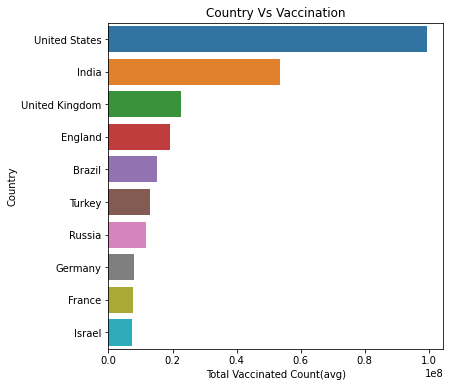

In [155]:
#Countries with best total vaccinations
max_vac= df_county_vac.groupby("country").total_vaccinations.mean().sort_values(ascending= False).head(10)
max_vac

#daily vaccinations barplot
plt.figure(figsize= (6,6))
ax= sns.barplot(max_vac.values,max_vac.index)
ax.set_title("Country Vs Vaccination")
ax.set_xlabel("Total Vaccinated Count(avg)")
ax.set_ylabel("Country")
plt.show()

# Total daily vaccination in Top 10 Countries

C:\Users\Ahilan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



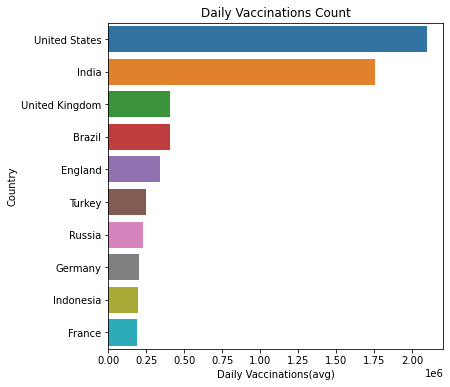

In [156]:
#Countries with best daily average vaccinations
total_daily= df_county_vac.groupby("country").daily_vaccinations.mean().sort_values(ascending= False).head(10)
total_daily

#daily vaccinations barplot
plt.figure(figsize= (6,6))
ax= sns.barplot(total_daily.values,total_daily.index)
ax.set_title("Daily Vaccinations Count")
ax.set_xlabel("Daily Vaccinations(avg)")
ax.set_ylabel("Country")
plt.show()

# Visulazie most popular vaccines among countries.

In [157]:

#Treemap

fig = px.treemap(country_total, path = ['vaccine_name', 'country'], values = 'total_vaccinations',
                title="Total Vaccinations Tree Map")
fig.show()

In [158]:
#geomap

country_daily = df_county_vac.sort_values(by=['total_vaccinations'], ascending=False)[["vaccine_name","date","country",'daily_vaccinations','total_vaccinations']]

# new data frame with split value "t"
country_daily["vaccine_name"]= country_daily["vaccine_name"].str.split("t", n = 1, expand = True)

# new data frame with split value " "
country_daily["vaccine_name"]= country_daily["vaccine_name"].str.split(" ", n = 1, expand = True)
  
# new data frame with split value ","
country_daily["vaccine_name"]= country_daily["vaccine_name"].str.split(",", n = 1, expand = True)


daily = country_daily.loc[:,['country', 'date', 'vaccine_name', 'daily_vaccinations']].dropna(subset=['daily_vaccinations'])
daily["date"] = pd.to_datetime(daily["date"], format = '%Y-%m-%d')

daily_agg = daily.groupby('country').daily_vaccinations.agg(
    sum_vaccination_amt  = 'sum',
    mean_vaccination_amt = 'mean')


full_daily = daily.merge(daily_agg, on = 'country')
vaccines_daily = full_daily.loc[:,['country', 'vaccine_name']]
vaccines_daily = vaccines_daily.groupby('vaccine_name')['country'].unique()
vaccines_daily = pd.DataFrame(vaccines).reset_index()
vaccines_daily

title = "Popular vaccines in countries"
data = full_daily
fig = px.choropleth(data, 
            locations="country", 
            locationmode='country names',
            color="vaccine_name", 
            hover_name="country",
                   title=title)


log_scale_vals = list(range(0,25,2))
scale_vals = (np.exp2(log_scale_vals)).astype(int).astype(str)



fig.update_layout(title_font_size=22,
                  margin={"r":20, "l":20},
                  coloraxis={#"showscale":False,
                            "colorbar":dict(title=title,
                                            #range=[np.log(50), np.log(6400)],
                                            titleside="top",
                                            tickmode="array",
                                            tickvals=log_scale_vals,
                                            ticktext=scale_vals
                                        )},
                 )

fig.show()

# Visulaizing Most Popular vaccine

In [159]:
!pip install wordcloud

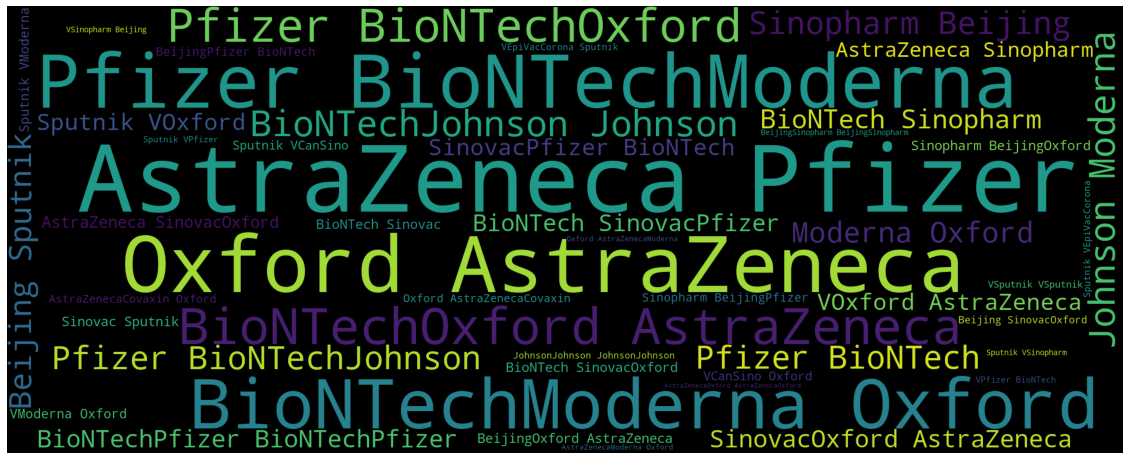

In [114]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize= (20,20))
words= "".join(df_county_vac["vaccine_name"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()  


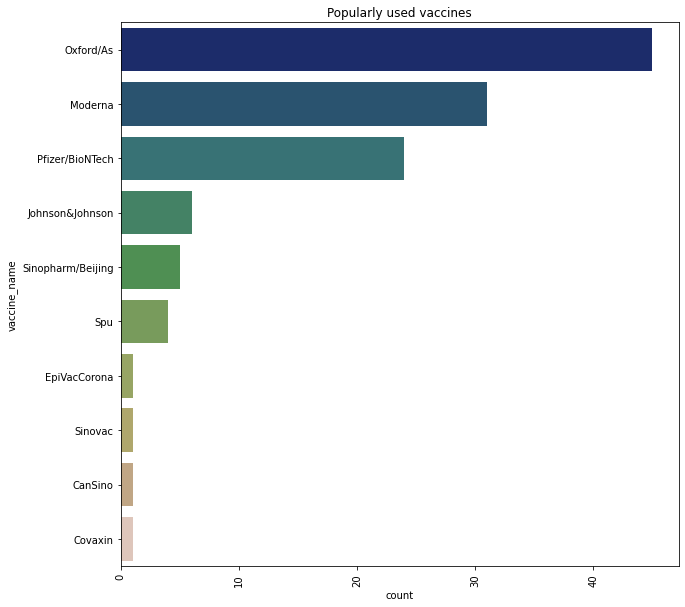

In [160]:
plt.figure(figsize=[10,10])
sns.countplot(y=vaccines.vaccine_name,palette='gist_earth',
             order=vaccines['vaccine_name'].value_counts().head(15).index)
plt.title("Popularly used vaccines")
plt.xticks(rotation=90);

# Visulazie the daily vaccination flow

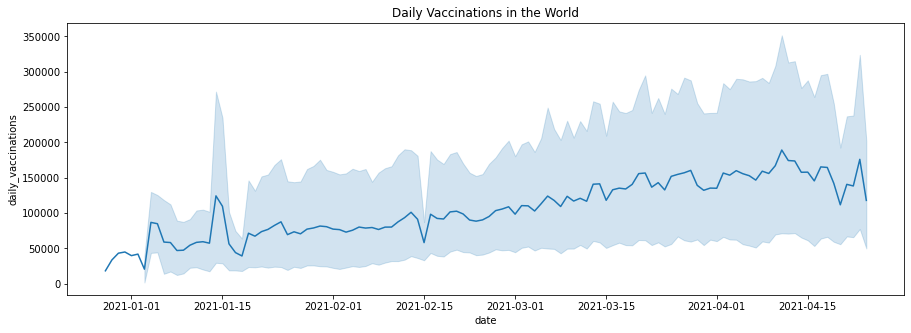

In [161]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations",data= df_county_vac)
plt.title("Daily Vaccinations in the World")
plt.show()

# Total vaccinations in Canada

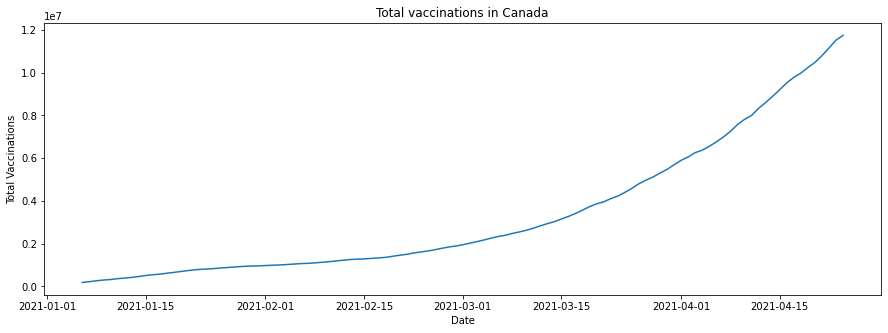

In [162]:
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Total vaccinations in Canada")
sns.lineplot(x= "date",y= "total_vaccinations",data= df_county_vac[df_county_vac["country"]=="Canada"])
plt.show()

# Daily vaccinations in Canada

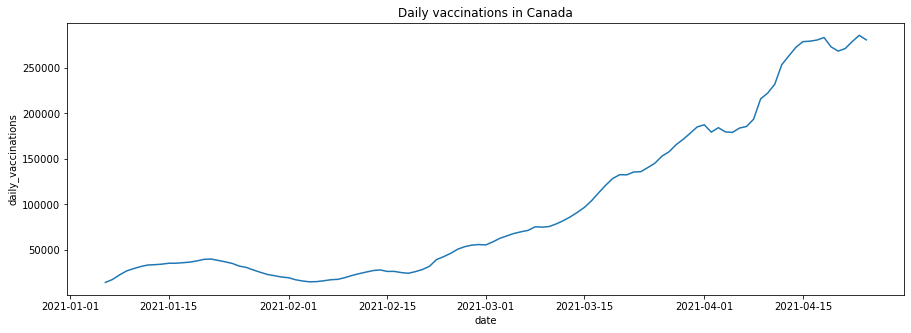

In [164]:
plt.figure(figsize= (15,5))

sns.lineplot(x= "date",y= "daily_vaccinations",data= df_county_vac[df_county_vac.country== "Canada"])
plt.title("Daily vaccinations in Canada")
plt.show()

##  Conclusion <a id="6"></a>

I would like to conclude this note book with the following details.

        -PFizer is the mostly used vaccine in the world.
        -Sinovac is leastly used vaccine in the world.
        -United States is the country which has vaccinated more people.
        -Also Fully vaccination rate is high in the county United States.
        -In United States they have used Johnson & Johnson vaccine mostly.

Thank you for your time to spend time on my Note Book. If you have any doubts/clarification please feel free to give your feedback.

Thank you.


### Author


###### Suganya Ahilan


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2021-05-16        | 0.1     | Suganya Ahilan | Created initial version  |
